In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
#rec = 'ABD1'
rec = 'ABD1-fixedlen'
#rec = 'KIX'
#names = [
#    'Pdr1AD',
#    'Gal4',
#    'Ppr1',
#    'Pip2',
#]

#rec = 'KIX'
names = [
    'Ace2_53',
    'Aro80_888',
    'Cha4_622',
    'Crz1_252',
    'Gln3_63',
    'Leu3_857',
    'Oaf1_1032',
    'Oaf3_846',
    'Pul4_139',
    'Put3_926',
    'Rdr1_525',
    'Rds1_813',
    'Rsf2_586',
    'Rsf2_688',
    'Sef1_1132',
    'Stb4_932',
    'Sum1_1030',
    'Tda9_456',
    'Tec1_227',
    'Tog1_772',
    'Urc2_739',
    'War1_930',
    'YKL222C_669',
    'YLR278C_1327',
    'Yrm1_758',
]

In [4]:
def load_results(rec, name):
    # Dynamic RMSD cutoff
    dynamic = False
    
    if dynamic:
        cluster_path = '../' + rec + '/' + name + '/analysis-dynamic/top500'
        all_path = '../' + rec + '/' + name + '/analysis-dynamic/all'
        output_path = '../' + rec + '/' + name + '/viz-dynamic'
    else:
        cluster_path = '../' + rec + '/' + name + '/analysis/top500'
        all_path = '../' + rec + '/' + name + '/analysis/all'
        output_path = '../' + rec + '/' + name + '/viz'
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    print('loading ' + cluster_path)
    cluster_results = pd.read_csv(cluster_path, delimiter=' ')
    all_results = pd.read_csv(all_path, delimiter=' ')
    return output_path, cluster_results, all_results

In [5]:
def cluster_fig(cluster_results, name, output_path):
    best_clusters = cluster_results.groupby('cluster').apply(lambda x: x['reweighted_sc'].min()).sort_values().index.values
    LABEL_COLOR_MAP = {
        best_clusters[0]: 'r',
        best_clusters[1]: 'm',
        best_clusters[3]: 'b',
        best_clusters[4]: 'g',
        best_clusters[5]: 'y',
     #   6: 'c',
    }

    cluster_results['color'] = cluster_results['cluster'].apply(lambda x: LABEL_COLOR_MAP[x] if x in LABEL_COLOR_MAP else 'k')
    tmp = cluster_results[cluster_results['color'] != 'k']
    plt.figure(figsize=(8, 8))
    plt.scatter(tmp['reweighted_sc'], tmp['rms'], c=tmp['color'])
    plt.ylabel('rms')
    plt.xlabel('Rosetta score')
    plt.title(name)
    if output_path is not None:
        plt.savefig(output_path + '/cluster_viz_{:}.png'.format(name), dpi=300)

In [6]:
def all_fig(all_results, name, output_path):
    plt.figure(figsize=(8, 8))
    plt.scatter(all_results['rms'], all_results['reweighted_sc'], s=2)
    plt.xlabel('rms')
    plt.ylabel('Rosetta score')
    plt.ylim(all_results['reweighted_sc'].min() - 5, np.percentile(all_results['reweighted_sc'],99))
    plt.title(name)
    if output_path is not None:
        plt.savefig(output_path + '/all_viz_{:}.png'.format(name), dpi=300)

In [ ]:
for name in names:
    print(name)
    output_path, cluster_results, all_results = load_results(rec, name)
    cluster_fig(cluster_results, name, output_path)
    all_fig(all_results, name, output_path)
    plt.close('all')

Rsf2_586
loading ../ABD1-fixedlen/Rsf2_586/analysis/top500
Rsf2_688
loading ../ABD1-fixedlen/Rsf2_688/analysis/top500
Sef1_1132
loading ../ABD1-fixedlen/Sef1_1132/analysis/top500
Stb4_932
loading ../ABD1-fixedlen/Stb4_932/analysis/top500
Sum1_1030
loading ../ABD1-fixedlen/Sum1_1030/analysis/top500
Tda9_456
loading ../ABD1-fixedlen/Tda9_456/analysis/top500
Tec1_227
loading ../ABD1-fixedlen/Tec1_227/analysis/top500
Tog1_772
loading ../ABD1-fixedlen/Tog1_772/analysis/top500
Urc2_739
loading ../ABD1-fixedlen/Urc2_739/analysis/top500
War1_930
loading ../ABD1-fixedlen/War1_930/analysis/top500


In [27]:
rec = 'KIX'
name = 'Pdr1ADrep'
_, cluster_results, all_results = load_results(rec, name)

loading ../KIX/Pdr1ADrep/analysis/top500


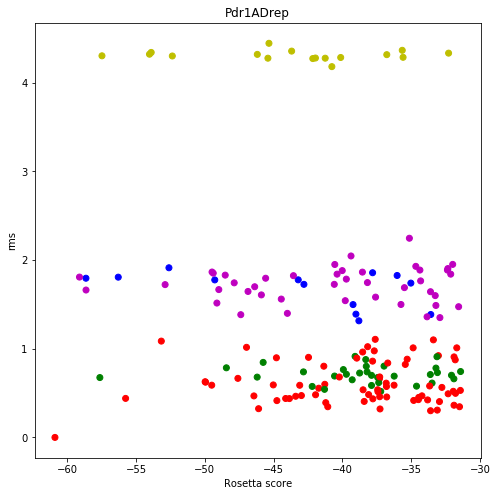

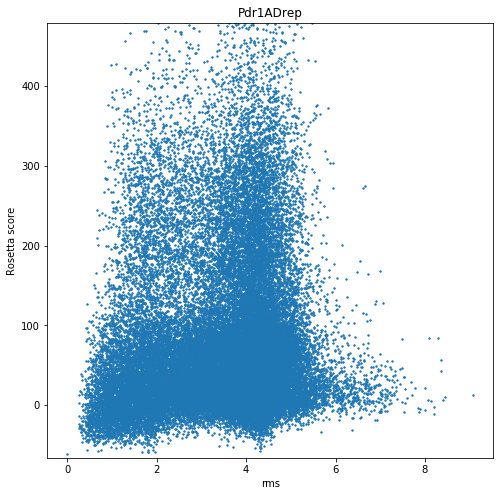

In [28]:
cluster_fig(cluster_results, name, None)
plt.show()
all_fig(all_results, name, None)
plt.show()

In [29]:
cluster_results.sort_values('reweighted_sc')

,description,rms,cluster,cluster_idx,reweighted_sc,color
292,2k0n_Pdr1ADrep_prepack_28765,0.000,0,39,-60.895,r
482,2k0n_Pdr1ADrep_prepack_47854,1.808,1,41,-59.113,m
377,2k0n_Pdr1ADrep_prepack_37428,1.955,68,1,-58.860,k
145,2k0n_Pdr1ADrep_prepack_14962,1.795,6,8,-58.643,b
373,2k0n_Pdr1ADrep_prepack_36955,1.662,1,34,-58.637,m
...,...,...,...,...,...,...
354,2k0n_Pdr1ADrep_prepack_35292,3.641,99,0,-31.436,k
361,2k0n_Pdr1ADrep_prepack_35858,0.530,0,49,-31.426,r
461,2k0n_Pdr1ADrep_prepack_45862,0.743,3,29,-31.410,g
472,2k0n_Pdr1ADrep_prepack_46574,3.997,137,0,-31.351,k


In [19]:
cluster_results['cluster'].value_counts()

0      35
1      30
3      12
2      10
4       9
       ..
169     1
168     1
166     1
165     1
136     1
Name: cluster, Length: 274, dtype: int64

In [22]:
name

'Yrm1_758'